In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df_air=pd.read_csv('data.csv', encoding="unicode_escape")


In [3]:
sampled_data = df_air.sample(n=10000, random_state=42)

# Save the sampled data to a new CSV file
sampled_data.to_csv('airqual234.csv', index=False)

In [5]:
df_air_india=pd.read_csv('airqual234.csv', encoding="unicode_escape")

In [6]:
df_air_india.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,470.0,06-03-14,Telangana,Hyderabad,Andhra Pradesh State Pollution Control Board,Sensitive Area,4.0,16.0,97.0,NaN,"Zoo Park, Hyderabad",NaN,2014-03-06
1,314.0,29/08/2011,Maharashtra,Nagpur,Visveshwaraya National Institute Of Technology,"Residential, Rural and other Areas",10.0,32.0,97.0,NaN,"Govt.Polytechnic College,Nagpur.",NaN,2011-08-29
2,NaN,26/10/2006,Tamil Nadu,Coimbatore,NaN,Residential and others,12.2,29.4,36.0,52.0,Ponniyarajapuram,NaN,2006-10-26
3,304.0,5/1/2010,Maharashtra,Thane,Thane Municipal Corporation,"Residential, Rural and other Areas",17.0,17.0,48.0,76.0,"Terrace Of Shahu Market,Naupada, Thane West",NaN,2010-01-05
4,NaN,24/11/2008,Odisha,Balasore,NaN,Residential and others,NaN,11.0,71.0,144.0,Sahadevkhunta,NaN,2008-11-24


In [7]:
df_air_india.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
9995,330,3/10/2010,Haryana,Faridabad,Haryana State Pollution Control Board,"Residential, Rural and other Areas",16.0,20.0,156.0,NaN,"Regional Office, Haryana State Pollution Contr...",NaN,2010-10-03
9996,NaN,15-06-07,Andhra Pradesh,Hyderabad,NaN,Residential and others,5.1,36.1,80.0,309.0,Paradise,NaN,2007-06-15
9997,NaN,28-11-05,Gujarat,Ahmedabad,NaN,Industrial Areas,16.4,26.3,137.0,318.0,Cadilla Bridge Narol,NaN,2005-11-28
9998,333,19-05-14,Gujarat,Vadodara,Gujarat State Pollution Control Board,"Residential, Rural and other Areas",16.0,25.0,87.0,NaN,"Dandia Bazaar, Vadodara",36.0,2014-05-19
9999,84.0,March - M031997,Madhya Pradesh,Nagda,Madhya Pradesh Pollution Control Board,"Residential, Rural and other Areas",35.6,55.5,NaN,241.0,NaN,NaN,1997-03-01


In [8]:
df_air_india.dtypes

stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [9]:
df_air_india.shape

(10000, 13)

In [10]:
df_air_india.info

<bound method DataFrame.info of      stn_code    sampling_date           state    location  \
0       470.0         06-03-14       Telangana   Hyderabad   
1       314.0       29/08/2011     Maharashtra      Nagpur   
2         NaN       26/10/2006      Tamil Nadu  Coimbatore   
3       304.0         5/1/2010     Maharashtra       Thane   
4         NaN       24/11/2008          Odisha    Balasore   
...       ...              ...             ...         ...   
9995      330        3/10/2010         Haryana   Faridabad   
9996      NaN         15-06-07  Andhra Pradesh   Hyderabad   
9997      NaN         28-11-05         Gujarat   Ahmedabad   
9998      333         19-05-14         Gujarat    Vadodara   
9999     84.0  March - M031997  Madhya Pradesh       Nagda   

                                              agency  \
0       Andhra Pradesh State Pollution Control Board   
1     Visveshwaraya National Institute Of Technology   
2                                                NaN   

In [11]:
df_air_india.isnull().sum()

stn_code                       3227
sampling_date                     1
state                             0
location                          1
agency                         3344
type                            121
so2                             770
no2                             361
rspm                            903
spm                            5533
location_monitoring_station     606
pm2_5                          9788
date                              1
dtype: int64

In [12]:
df_air_india.describe()

,so2,no2,rspm,spm,pm2_5
count,9230.000000,9639.000000,9097.000000,4467.000000,212.000000
mean,10.938766,25.935463,109.508592,218.269164,41.610425
std,11.925507,18.172461,76.009792,149.195773,31.373687
min,0.000000,0.000000,0.000000,0.000000,7.000000
25%,5.000000,14.000000,56.000000,109.333333,24.000000
50%,8.000000,22.000000,90.000000,186.000000,32.000000
75%,13.900000,32.400000,143.000000,295.000000,47.250000
max,340.000000,243.000000,1288.000000,1071.000000,262.000000


In [13]:
df_air_india.nunique()

stn_code                        717
sampling_date                  3855
state                            34
location                        291
agency                           63
type                             10
so2                             680
no2                            1043
rspm                            769
spm                             891
location_monitoring_station     944
pm2_5                            86
date                           3781
dtype: int64

In [14]:
df_air_india.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [15]:
df_air_india['state'].value_counts()

Maharashtra             1411
Uttar Pradesh            958
Punjab                   622
Andhra Pradesh           593
Kerala                   585
Himachal Pradesh         555
West Bengal              553
Rajasthan                544
Gujarat                  484
Madhya Pradesh           448
Tamil Nadu               443
Assam                    438
Odisha                   436
Karnataka                376
Delhi                    219
Chhattisgarh             191
Chandigarh               186
Jharkhand                141
Goa                      141
Mizoram                  132
Puducherry                88
Telangana                 82
Meghalaya                 81
Haryana                   73
Bihar                     59
Nagaland                  56
Uttarakhand               36
Jammu & Kashmir           30
Dadra & Nagar Haveli      14
Daman & Diu               13
Uttaranchal                6
Arunachal Pradesh          3
Manipur                    2
Tripura                    1
Name: state, d

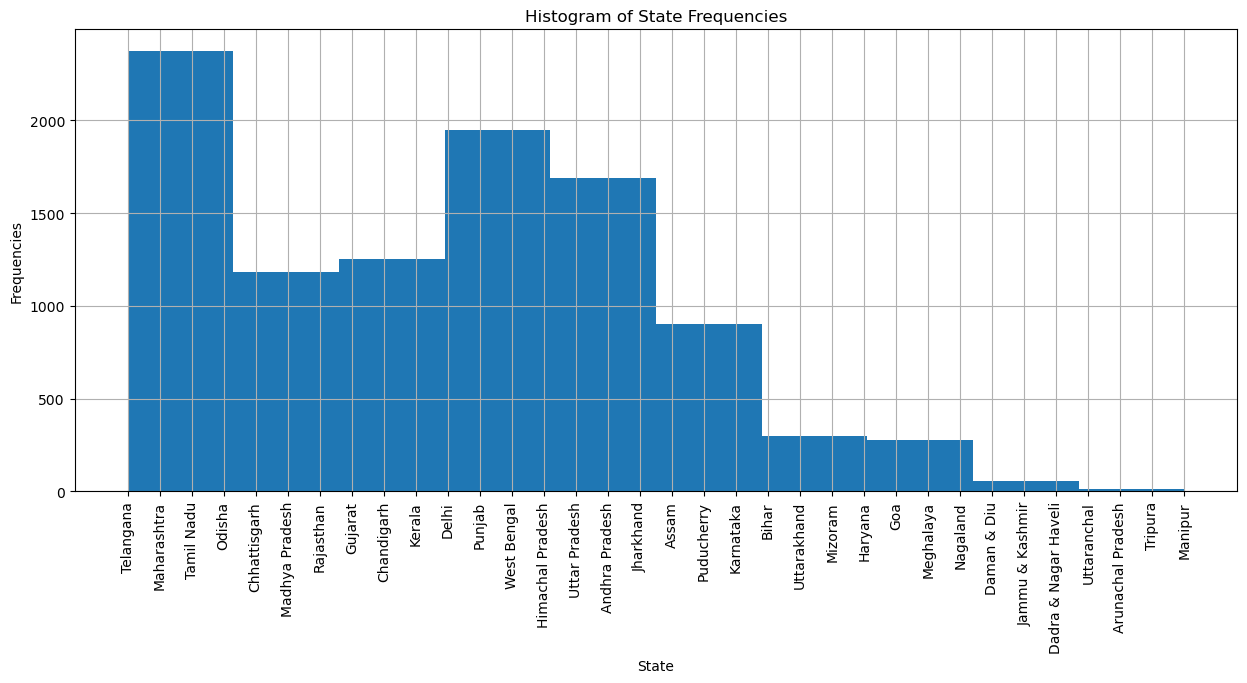

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,6))
plt.xticks(rotation=90)

df_air_india['state'].hist()
plt.xlabel('State')
plt.ylabel('Frequencies')
plt.title('Histogram of State Frequencies')


plt.show()
#the visualization shows us the count of states present in the dataset

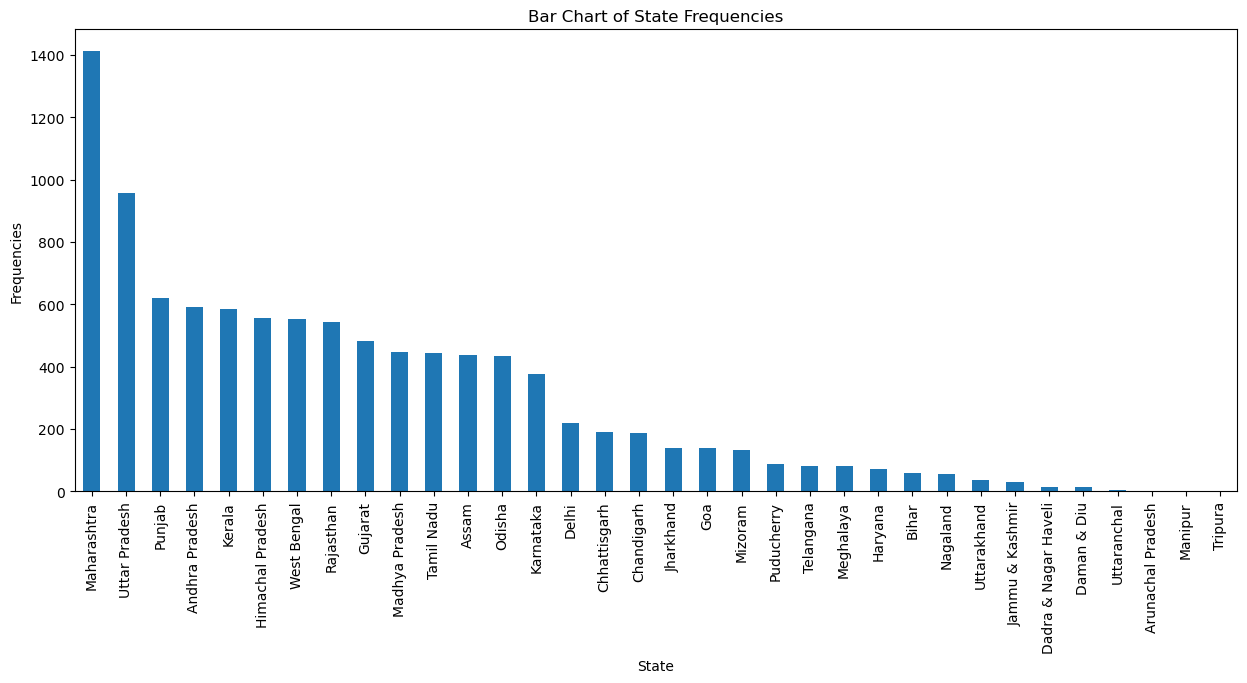

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.xticks(rotation=90)

df_air_india['state'].value_counts().plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Frequencies')
plt.title('Bar Chart of State Frequencies')

plt.show()

In [18]:
df_air_india['type'].value_counts()

Residential, Rural and other Areas    4224
Industrial Area                       2165
Residential and others                1970
Industrial Areas                      1136
Sensitive Area                         213
Sensitive Areas                        120
RIRUO                                   30
Sensitive                               17
Industrial                               3
Residential                              1
Name: type, dtype: int64

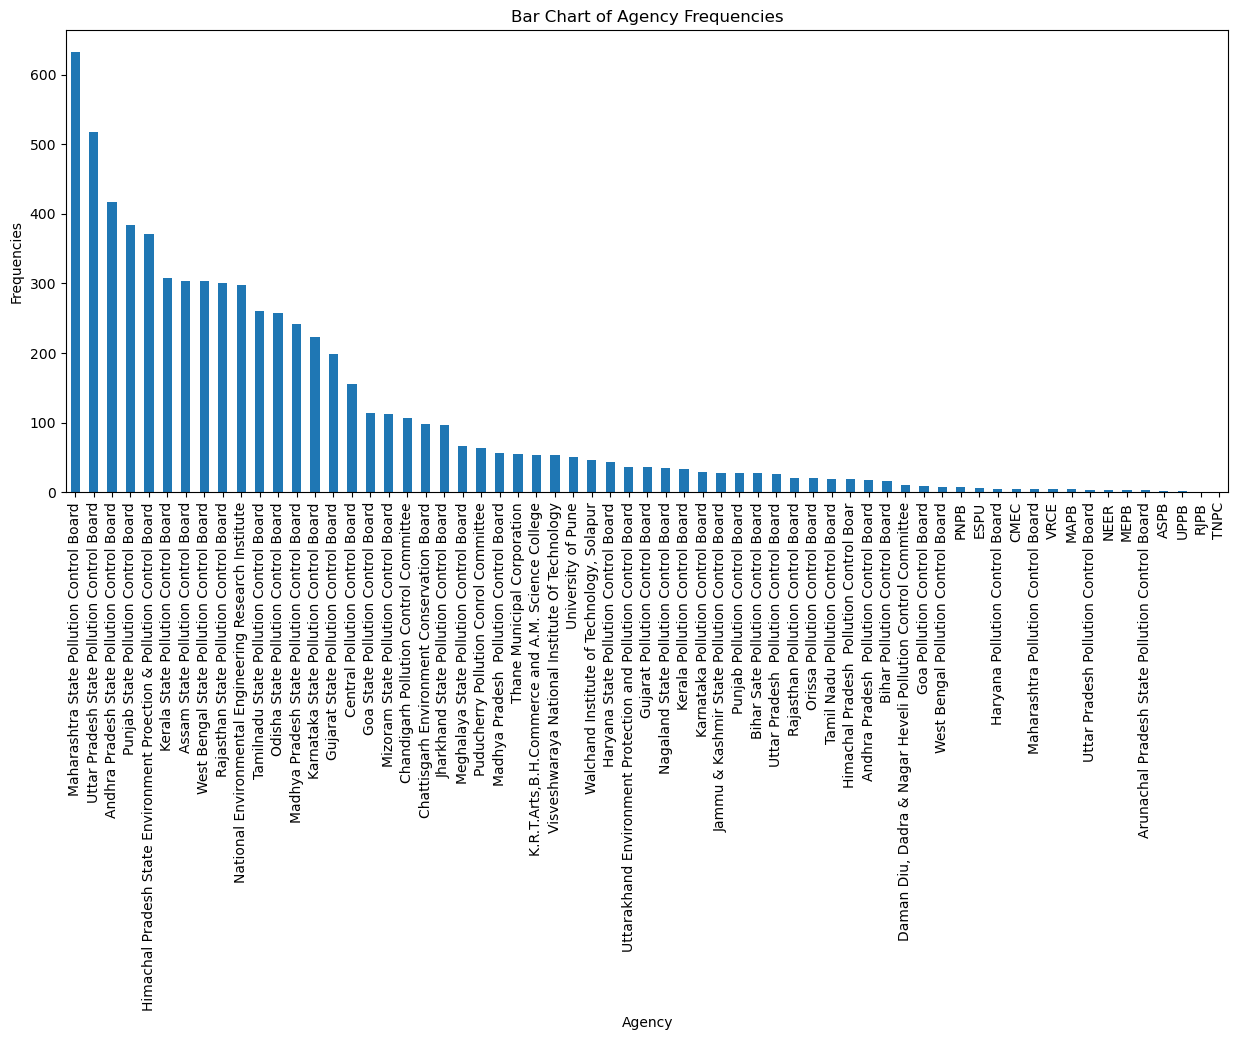

In [19]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)

df_air_india['agency'].value_counts().plot(kind='bar')
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.title('Bar Chart of Agency Frequencies')

plt.show()

In [20]:
df_air_india['state'].value_counts()

Maharashtra             1411
Uttar Pradesh            958
Punjab                   622
Andhra Pradesh           593
Kerala                   585
Himachal Pradesh         555
West Bengal              553
Rajasthan                544
Gujarat                  484
Madhya Pradesh           448
Tamil Nadu               443
Assam                    438
Odisha                   436
Karnataka                376
Delhi                    219
Chhattisgarh             191
Chandigarh               186
Jharkhand                141
Goa                      141
Mizoram                  132
Puducherry                88
Telangana                 82
Meghalaya                 81
Haryana                   73
Bihar                     59
Nagaland                  56
Uttarakhand               36
Jammu & Kashmir           30
Dadra & Nagar Haveli      14
Daman & Diu               13
Uttaranchal                6
Arunachal Pradesh          3
Manipur                    2
Tripura                    1
Name: state, d

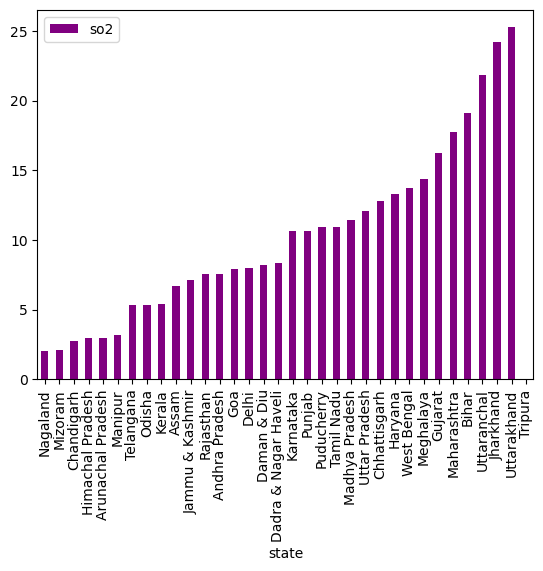

In [22]:
df_air_india[['so2', 'state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()

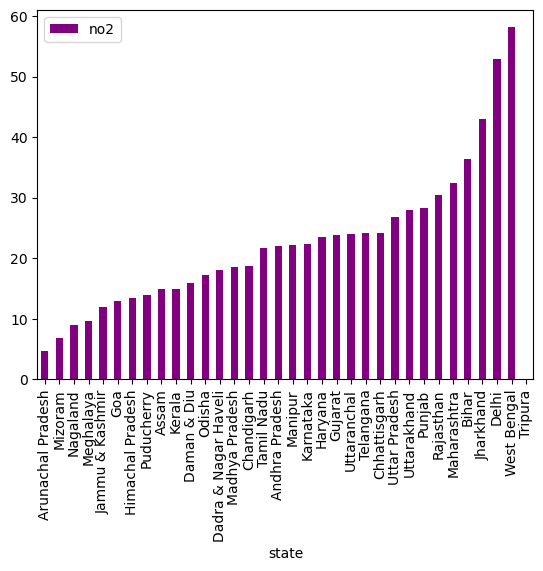

In [25]:
df[['no2', 'state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()

<AxesSubplot:xlabel='state', ylabel='rspm'>

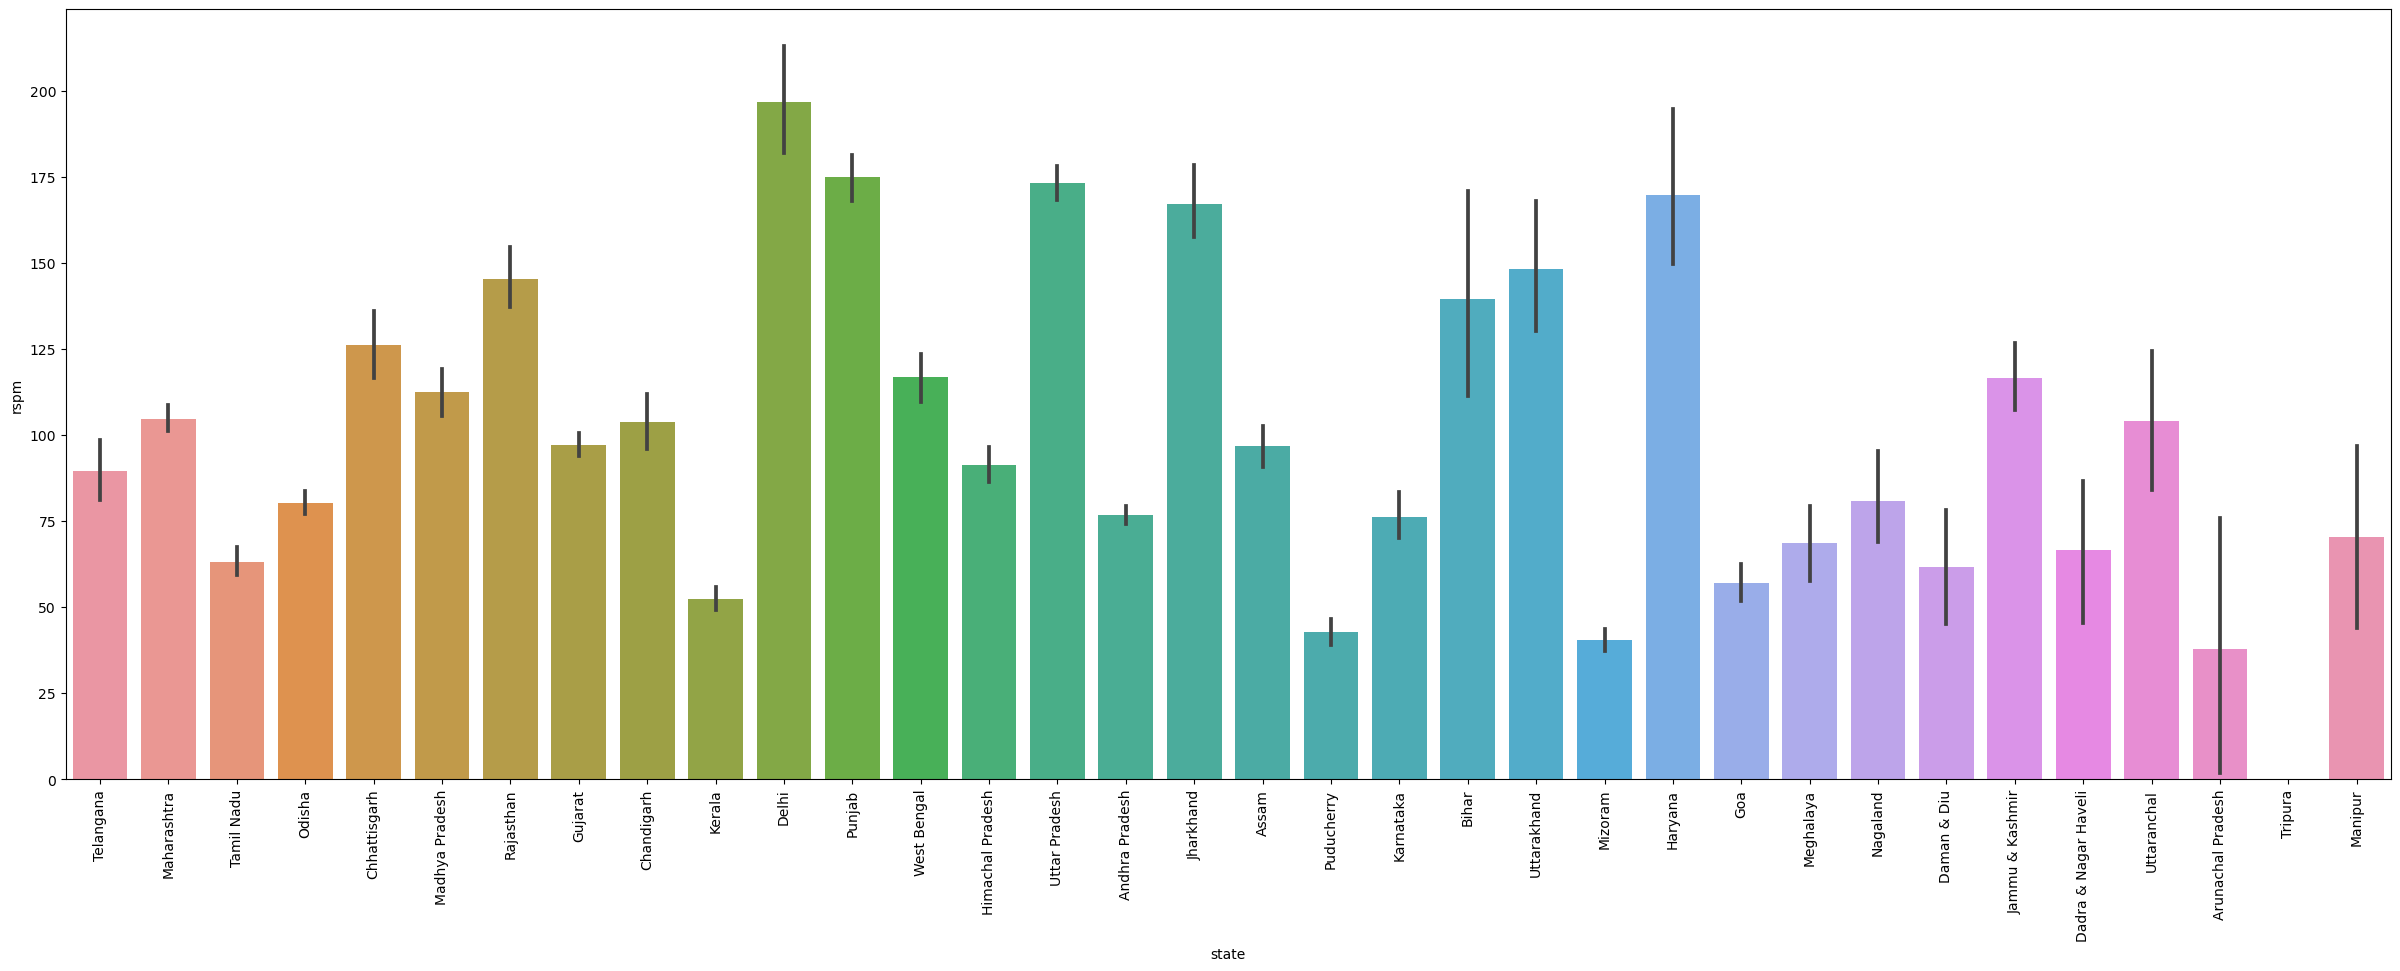

In [26]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state', y='rspm', data=df)

<AxesSubplot:xlabel='state', ylabel='spm'>

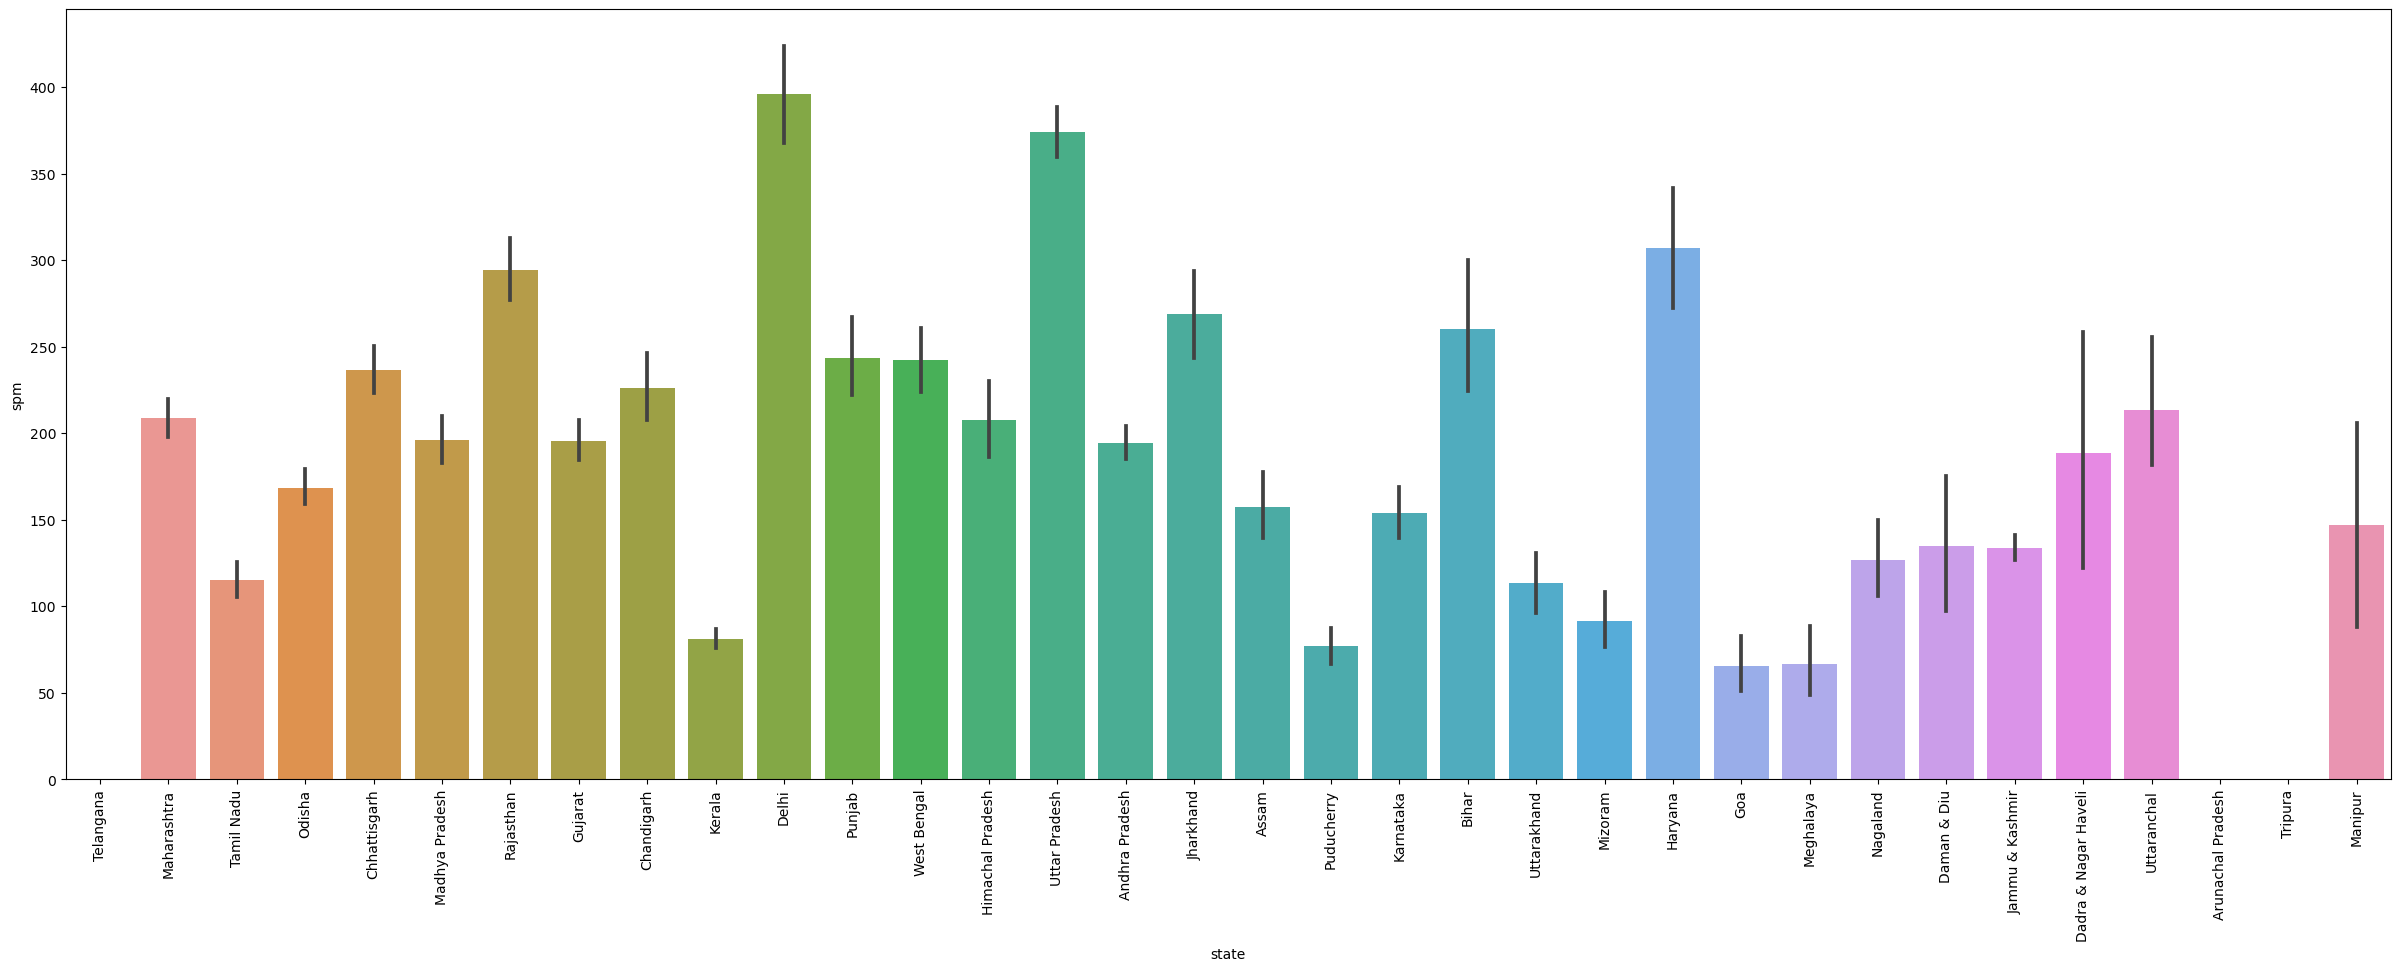

In [27]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state', y='spm', data=df)

<AxesSubplot:xlabel='state', ylabel='pm2_5'>

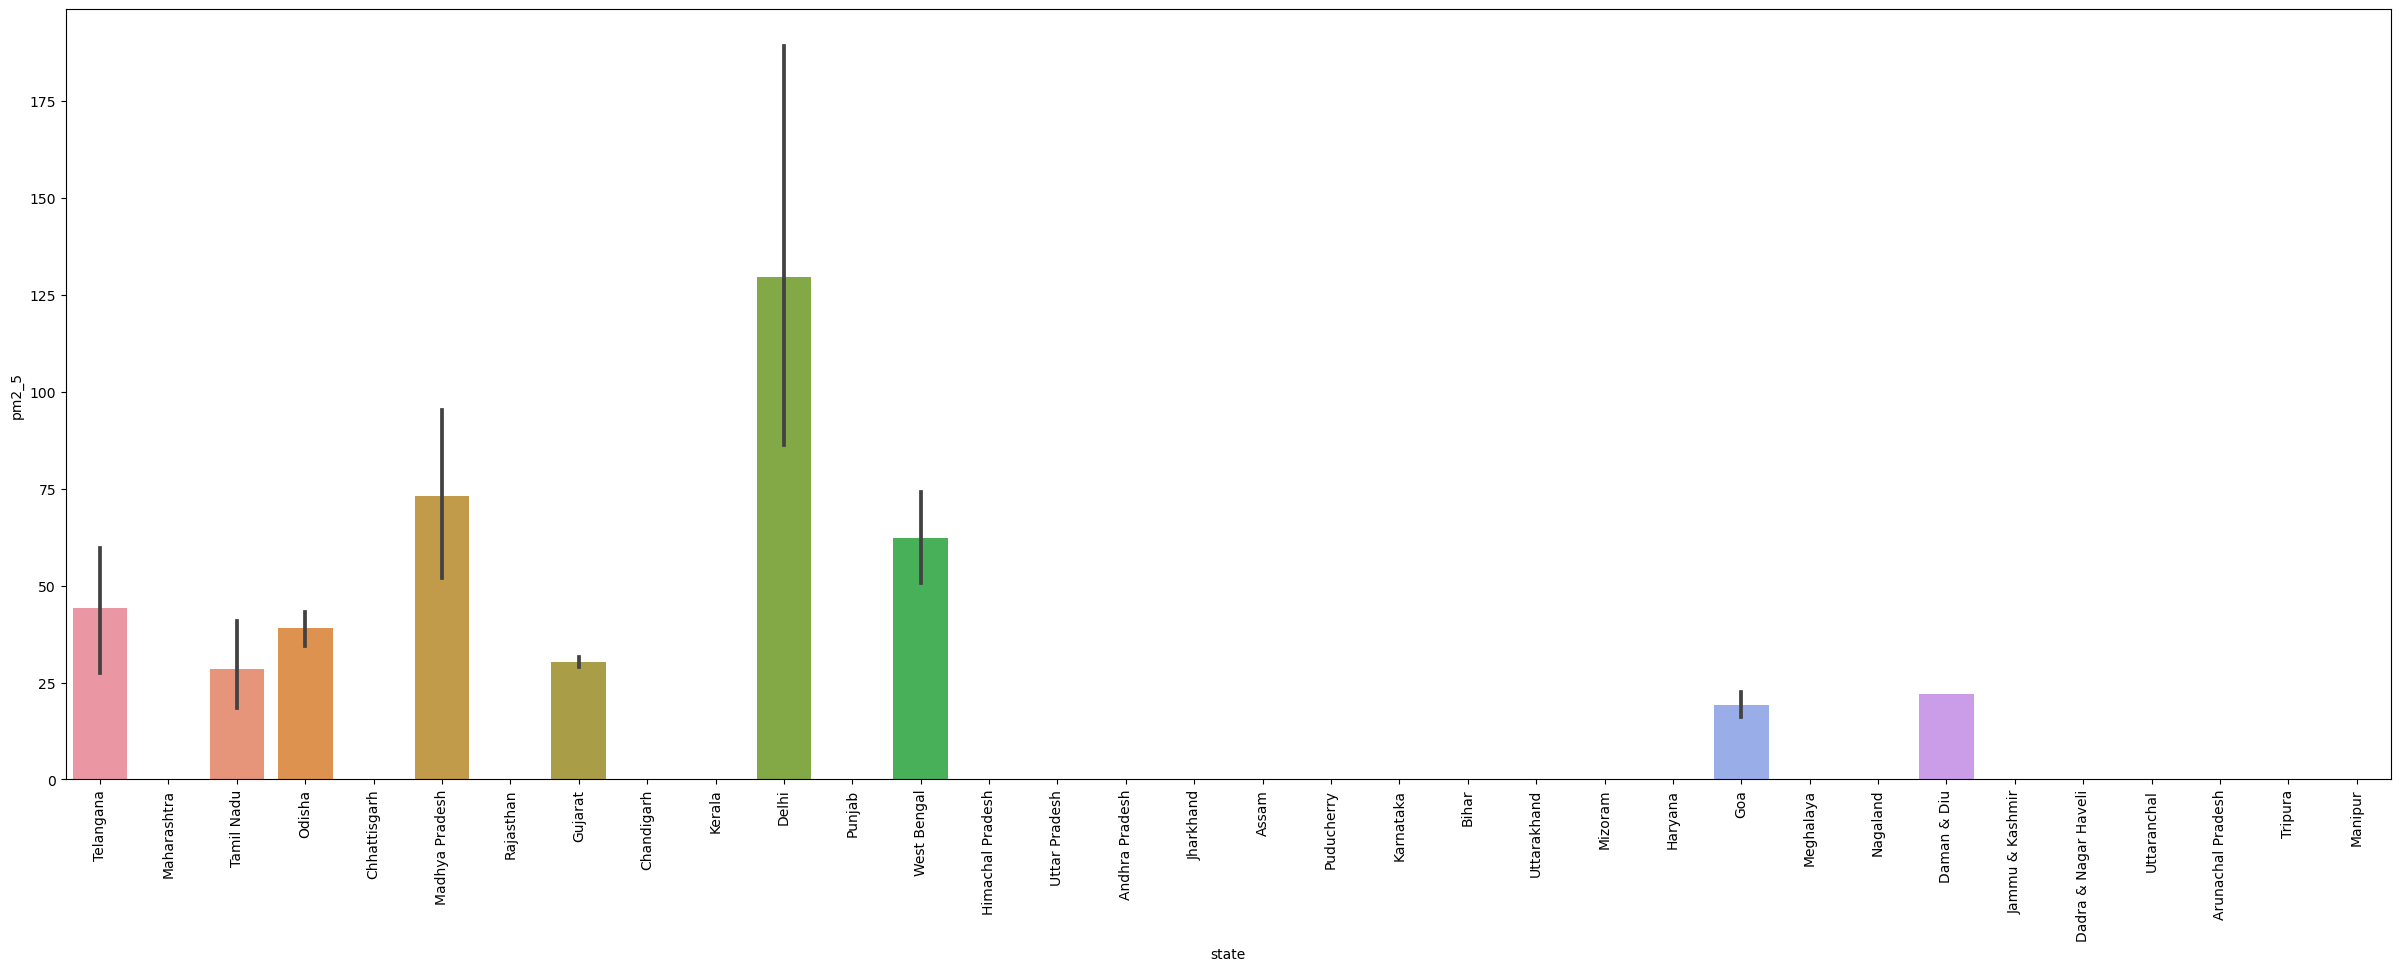

In [28]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state', y='pm2_5', data=df)

In [33]:
null_values= df_air_india.isnull().sum().sort_values(ascending=False)


In [27]:
null_values

pm2_5                          9788
spm                            5533
agency                         3344
stn_code                       3227
rspm                            903
so2                             770
location_monitoring_station     606
no2                             361
type                            121
sampling_date                     1
location                          1
date                              1
state                             0
dtype: int64

In [28]:
n_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)


In [31]:
missing_d_percentage=pd.concat([nullvalues, n_values_percentage], axis=1, keys=['Total', 'Percent'])

In [32]:
missing_d_percentage

,Total,Percent
pm2_5,9788,97.88
spm,5533,55.33
agency,3344,33.44
stn_code,3227,32.27
rspm,903,9.03
so2,770,7.70
location_monitoring_station,606,6.06
no2,361,3.61
type,121,1.21
sampling_date,1,0.01


In [34]:
df_air_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     6773 non-null   object 
 1   sampling_date                9999 non-null   object 
 2   state                        10000 non-null  object 
 3   location                     9999 non-null   object 
 4   agency                       6656 non-null   object 
 5   type                         9879 non-null   object 
 6   so2                          9230 non-null   float64
 7   no2                          9639 non-null   float64
 8   rspm                         9097 non-null   float64
 9   spm                          4467 non-null   float64
 10  location_monitoring_station  9394 non-null   object 
 11  pm2_5                        212 non-null    float64
 12  date                         9999 non-null   object 
dtypes: float64(5), ob

In [35]:
df_air_india.drop(['agency'], axis=1, inplace=True)
df_air_india.drop(['stn_code'], axis=1, inplace=True)
df_air_india.drop(['date'], axis=1, inplace=True)
df_air_india.drop(['sampling_date'], axis=1, inplace=True)
df_air_india.drop(['location_monitoring_station'], axis=1, inplace=True)


In [36]:
df_air_india.isnull().sum()

state          0
location       1
type         121
so2          770
no2          361
rspm         903
spm         5533
pm2_5       9788
dtype: int64

In [37]:
df_air_india

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Telangana,Hyderabad,Sensitive Area,4.0,16.0,97.0,NaN,NaN
1,Maharashtra,Nagpur,"Residential, Rural and other Areas",10.0,32.0,97.0,NaN,NaN
2,Tamil Nadu,Coimbatore,Residential and others,12.2,29.4,36.0,52.0,NaN
3,Maharashtra,Thane,"Residential, Rural and other Areas",17.0,17.0,48.0,76.0,NaN
4,Odisha,Balasore,Residential and others,NaN,11.0,71.0,144.0,NaN
...,...,...,...,...,...,...,...,...
9995,Haryana,Faridabad,"Residential, Rural and other Areas",16.0,20.0,156.0,NaN,NaN
9996,Andhra Pradesh,Hyderabad,Residential and others,5.1,36.1,80.0,309.0,NaN
9997,Gujarat,Ahmedabad,Industrial Areas,16.4,26.3,137.0,318.0,NaN
9998,Gujarat,Vadodara,"Residential, Rural and other Areas",16.0,25.0,87.0,NaN,36.0


In [38]:
df_air_india['location']=df_air_india['location'].fillna(df_air_india['location'].mode()[0])
df_air_india['type']=df_air_india['type'].fillna(df_air_india['type'].mode()[0])

In [39]:
df_air_india.fillna(0, inplace=True)

In [40]:
df_air_india.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [41]:
df_air_india

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Telangana,Hyderabad,Sensitive Area,4.0,16.0,97.0,0.0,0.0
1,Maharashtra,Nagpur,"Residential, Rural and other Areas",10.0,32.0,97.0,0.0,0.0
2,Tamil Nadu,Coimbatore,Residential and others,12.2,29.4,36.0,52.0,0.0
3,Maharashtra,Thane,"Residential, Rural and other Areas",17.0,17.0,48.0,76.0,0.0
4,Odisha,Balasore,Residential and others,0.0,11.0,71.0,144.0,0.0
...,...,...,...,...,...,...,...,...
9995,Haryana,Faridabad,"Residential, Rural and other Areas",16.0,20.0,156.0,0.0,0.0
9996,Andhra Pradesh,Hyderabad,Residential and others,5.1,36.1,80.0,309.0,0.0
9997,Gujarat,Ahmedabad,Industrial Areas,16.4,26.3,137.0,318.0,0.0
9998,Gujarat,Vadodara,"Residential, Rural and other Areas",16.0,25.0,87.0,0.0,36.0


In [42]:
def cal_SOi(so2):
    si = 0
    if (so2 <= 40):
        si = so2 * (50/40)
    elif (so2 > 40 and so2 <= 80):
        si = 5 + (so2 - 40) * (50/40)
    elif (so2 > 80 and so2 <= 380):
        si = 100 * (so2 - 80) * (100/300)
    elif (so2 > 380 and so2 <= 800):
        si = 200 + (so2 - 380) * (100/420)
    elif (so2 > 800 and so2 <= 1600):
        si = 300 * (so2 - 800) * (100/800)
    elif (so2 > 1600):
        si = 400 + (so2 - 1600) * (100/800)
    return si
    
df_air_india['Soi'] = df_air_india['so2'].apply(cal_SOi)
data=df_air_india[['so2', 'Soi']]
data.head()

,so2,Soi
0,4.0,5.00
1,10.0,12.50
2,12.2,15.25
3,17.0,21.25
4,0.0,0.00


In [43]:
def cal_NOi(no2):
    ni = 0
    if (no2 <= 40):
        ni = no2*50/40
    elif (no2 > 40 and no2 <= 80):
        ni = 50 + (no2 - 40) * (50/40)
    elif (no2 > 80 and no2 <= 180):
        ni = 100 + (no2 - 80) * (100/100)
    elif (no2 > 180 and no2 <= 280):
        ni = 200 + (no2 - 180) * (100/100)
    elif (no2 >280 and no2 <= 400):
        ni = 300 + (no2 - 280) * (100/120)
    else:
        ni = 400 + (no2 - 400) * (100/120)
    return ni
    
df_air_india['Noi'] = df_air_india['no2'].apply(cal_NOi)
data=df_air_india[['no2', 'Noi']]
data.head()

,no2,Noi
0,16.0,20.00
1,32.0,40.00
2,29.4,36.75
3,17.0,21.25
4,11.0,13.75


In [44]:
def cal_RSPMI(rspm):
    rpi = 0
    if (rpi <= 30):
        rpi = rpi*50/30
    elif (rpi > 30 and no2 <= 60):
        rpi = 50 + (rpi - 30) *50/30
    elif (rpi > 60 and rpi <= 90):
        rpi = 100 + (rpi - 60) * 100/30
    elif (rpi > 90 and rpi <= 120):
        rpi = 200 + (rpi - 90) * 100/30
    elif (rpi >120 and rpi <= 250):
        rpi = 300 + (rpi - 120) * (100/130)
    else:
        rpi = 400 + (rpi - 250) * (100/130)
    return rpi
    
df_air_india['Rpi'] = df_air_india['rspm'].apply(cal_RSPMI)
data=df_air_india[['rspm', 'Rpi']]
data.head()

,rspm,Rpi
0,97.0,0.0
1,97.0,0.0
2,36.0,0.0
3,48.0,0.0
4,71.0,0.0


In [45]:
def cal_SPMi(spm):
    spi = 0
    if (spm <= 50):
        spi = spm*50/50
    elif (spm > 50 and spm <= 100):
        spi = 50 + (spm - 50) *(50/50)
    elif (spm > 100 and spm <= 250):
        spi = 100 + (spm - 100) * (100/150)
    elif (spm > 250 and spm <= 350):
        spi = 200 + (spm - 250) * (100/100)
    elif (spm >350 and spm <= 430):
        spi = 300 + (spm - 350) * (100/80)
    else:
        spi = 400 + (spm - 430) * (100/430)
    return spi
    
df_air_india['SPMi'] = df_air_india['spm'].apply(cal_SPMi)
data=df_air_india[['spm', 'SPMi']]
data.head()

,spm,SPMi
0,0.0,0.000000
1,0.0,0.000000
2,52.0,52.000000
3,76.0,76.000000
4,144.0,129.333333


In [47]:
def cal_aqi(si, ni, rspmi, spmi):
    aqi = 0
    if si > ni and si > rspmi and si > spmi:
        aqi = si
    if ni > si and ni > rspmi and ni > spmi:
        aqi = ni
    if rspmi > si and rspmi > ni and rspmi > spmi:
        aqi = rspmi
    if spmi > si and spmi > ni and spmi > rspmi:
        aqi = spmi
    return aqi

df_air_india['AQI'] = df_air_india.apply(lambda x: cal_aqi(x['Soi'], x['Noi'], x['Rpi'], x['SPMi']), axis=1)
data = df_air_india[['state', 'Soi', 'Rpi', 'SPMi', 'AQI']]
data.head()

,state,Soi,Rpi,SPMi,AQI
0,Telangana,5.00,0.0,0.000000,20.000000
1,Maharashtra,12.50,0.0,0.000000,40.000000
2,Tamil Nadu,15.25,0.0,52.000000,52.000000
3,Maharashtra,21.25,0.0,76.000000,76.000000
4,Odisha,0.00,0.0,129.333333,129.333333


In [48]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "satisfactory"
    elif x>100 and x<=200:
        return "moderate"
    elif x>200 and x<=300:
        return "poor"
    elif x>300 and x<=400:
        return "severe"
    elif x>400:
        return "hazardous" 
    
df_air_india["AQI_Range"]=df_air_india['AQI'].apply(AQI_Range)
df_air_india.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,Soi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Telangana,Hyderabad,Sensitive Area,4.0,16.0,97.0,0.0,0.0,5.00,20.00,0.0,0.000000,20.000000,Good
1,Maharashtra,Nagpur,"Residential, Rural and other Areas",10.0,32.0,97.0,0.0,0.0,12.50,40.00,0.0,0.000000,40.000000,Good
2,Tamil Nadu,Coimbatore,Residential and others,12.2,29.4,36.0,52.0,0.0,15.25,36.75,0.0,52.000000,52.000000,satisfactory
3,Maharashtra,Thane,"Residential, Rural and other Areas",17.0,17.0,48.0,76.0,0.0,21.25,21.25,0.0,76.000000,76.000000,satisfactory
4,Odisha,Balasore,Residential and others,0.0,11.0,71.0,144.0,0.0,0.00,13.75,0.0,129.333333,129.333333,moderate


In [49]:
df_air_india["AQI_Range"].value_counts()

Good            5126
moderate        2091
satisfactory    1291
poor             723
hazardous        420
severe           349
Name: AQI_Range, dtype: int64

In [50]:
X=df_air_india[['Soi', 'Noi', 'Rpi', 'SPMi']]
Y=df_air_india['AQI']
X.head()


,Soi,Noi,Rpi,SPMi
0,5.00,20.00,0.0,0.000000
1,12.50,40.00,0.0,0.000000
2,15.25,36.75,0.0,52.000000
3,21.25,21.25,0.0,76.000000
4,0.00,13.75,0.0,129.333333


In [51]:
Y.head()

0     20.000000
1     40.000000
2     52.000000
3     76.000000
4    129.333333
Name: AQI, dtype: float64

In [52]:
X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=70)
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)


(8000, 4) (2000, 4) (8000,) (2000,)


In [ ]:
#linear regression

In [52]:
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [53]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [54]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test, test_pred)))
print("RMSE Training Data = ", str(RMSE_train))
print("RMSE Test Data=  ", str(RMSE_test))
print('-'*50)
print('r squared value on train', model.score(X_train, Y_train))
print('r squared value on test', model.score(X_test, Y_test))


RMSE Training Data =  16.2053838763255
RMSE Test Data=   16.494320174467692
--------------------------------------------------
r squared value on train 0.9914617268459474
r squared value on test 0.994064805719631


In [72]:
MSE_train = metrics.mean_squared_error(Y_train, train_pred)
MSE_test = metrics.mean_squared_error(Y_test, test_pred)
print("MSE Training Data = ", str(MSE_train))
print("MSE Test Data = ", str(MSE_test))

MSE Training Data =  262.61446657907044
MSE Test Data =  272.06259801785194


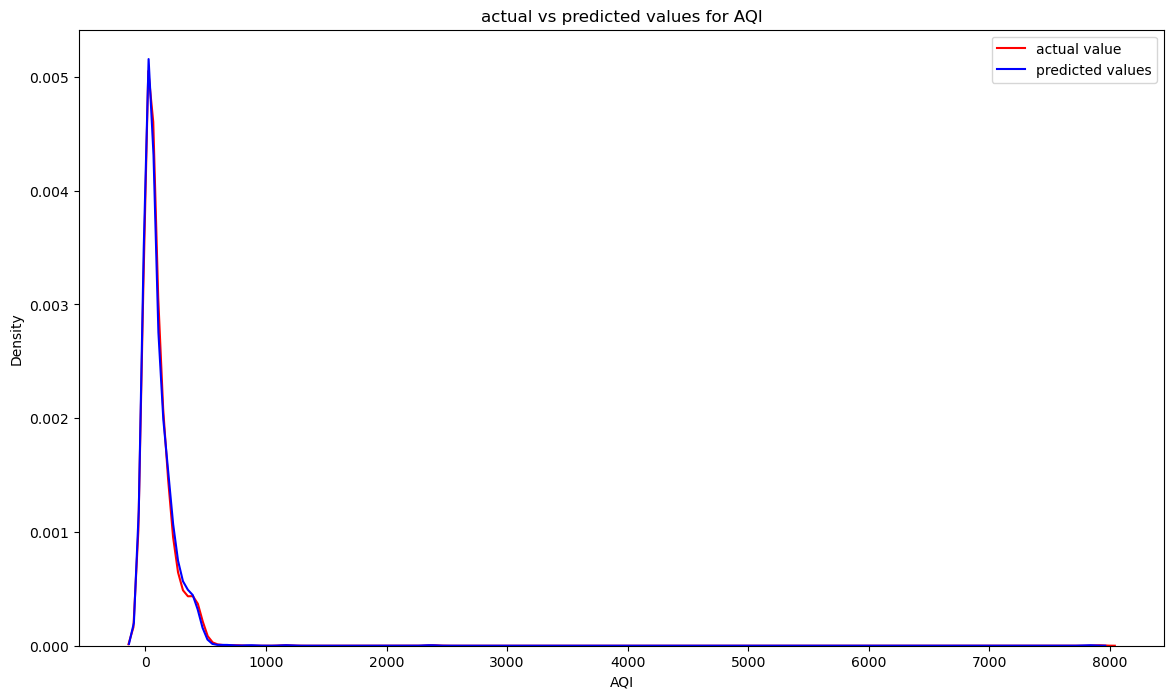

In [55]:
plt.figure(figsize=(14,8))
ax= sns.distplot(Y_test, hist=False , color="r", label="actual value ")
sns.distplot(test_pred, hist=False, color="b", label="predicted values", ax=ax)

plt.title('actual vs predicted values for AQI')
plt.legend()
plt.show()
plt.close()

In [ ]:
#Decision Tree Regressor

In [75]:
DT= DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [76]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [77]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test, test_preds)))
print("RMSE Training Data = ", str(RMSE_train))
print("RMSE Test Data=  ", str(RMSE_test))
print('-'*50)
print('r squared value on train', DT.score(X_train, Y_train))
print('r squared value on test', DT.score(X_test, Y_test))

RMSE Training Data =  8.282091126688803e-15
RMSE Test Data=   27.83544194586889
--------------------------------------------------
r squared value on train 1.0
r squared value on test 0.9830970564667023


In [78]:
MSE_train = metrics.mean_squared_error(Y_train, train_pred)
MSE_test = metrics.mean_squared_error(Y_test, test_pred)
print("MSE Training Data = ", str(MSE_train))
print("MSE Test Data = ", str(MSE_test))

MSE Training Data =  262.61446657907044
MSE Test Data =  272.06259801785194


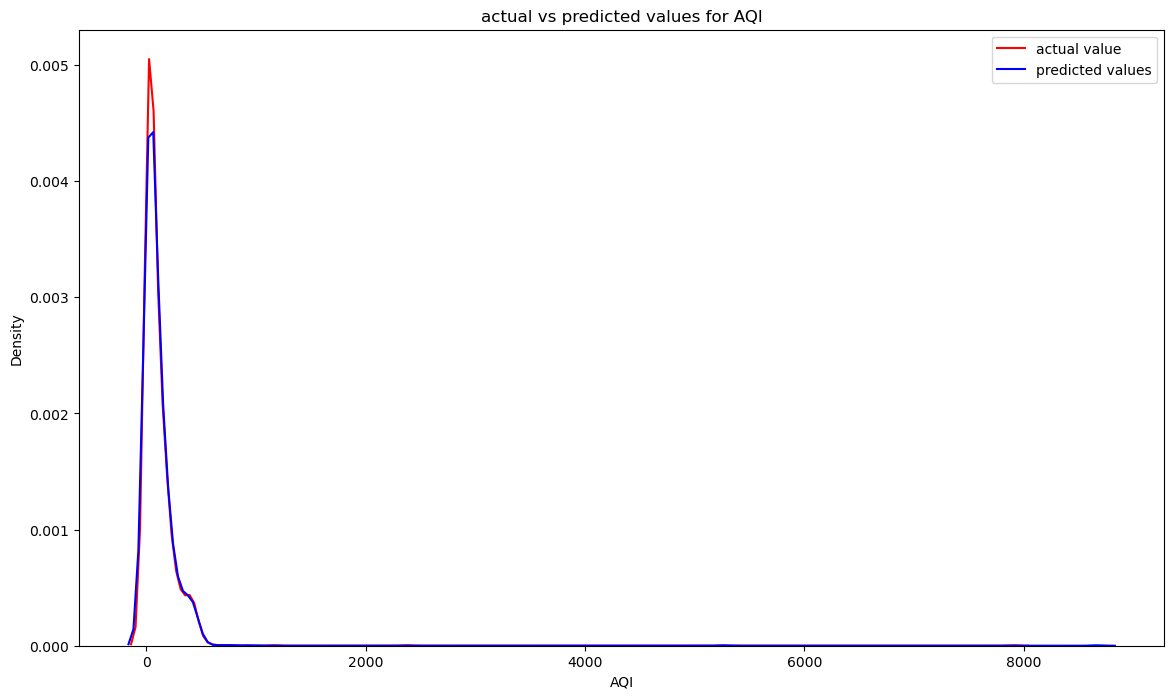

In [74]:
plt.figure(figsize=(14,8))
ax= sns.distplot(Y_test, hist=False , color="r", label="actual value ")
sns.distplot(test_preds, hist=False, color="b", label="predicted values", ax=ax)

plt.title('actual vs predicted values for AQI')
plt.legend()
plt.show()
plt.close()

In [ ]:
#Random Forest Regressor

In [59]:
RF=RandomForestRegressor().fit(X_train, Y_train)


In [60]:
train_preds1=RF.predict(X_train)
test_preds1=RF.predict(X_test)

In [61]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test, test_preds1)))
print("RMSE Training Data = ", str(RMSE_train))
print("RMSE Test Data=  ", str(RMSE_test))
print('-'*50)
print('r squared value on train', RF.score(X_train, Y_train))
print('r squared value on test', RF.score(X_test, Y_test))

RMSE Training Data =  18.499978795736915
RMSE Test Data=   39.1060169907131
--------------------------------------------------
r squared value on train 0.9888725959149312
r squared value on test 0.9666379085994485


In [79]:
MSE_train = metrics.mean_squared_error(Y_train, train_preds1)
MSE_test = metrics.mean_squared_error(Y_test, test_preds1)
print("MSE Training Data = ", str(MSE_train))
print("MSE Test Data = ", str(MSE_test))

MSE Training Data =  342.2492154427155
MSE Test Data =  1529.280564877942


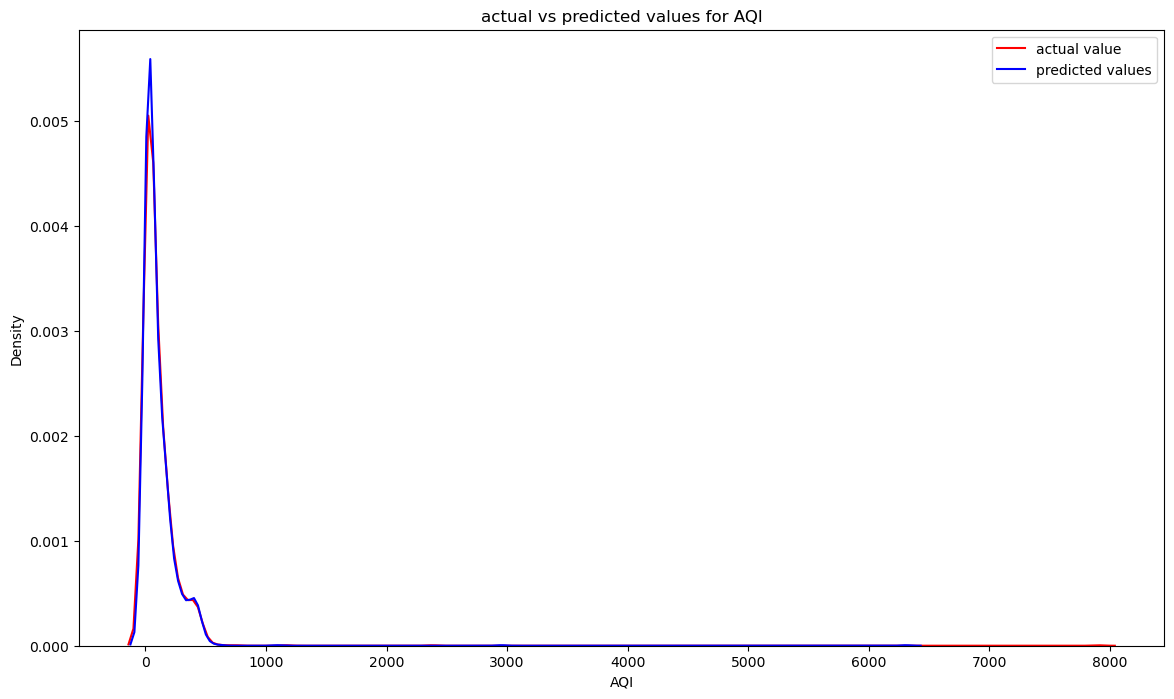

In [80]:
plt.figure(figsize=(14,8))
ax= sns.distplot(Y_test, hist=False , color="r", label="actual value ")
sns.distplot(test_preds1, hist=False, color="b", label="predicted values", ax=ax)

plt.title('actual vs predicted values for AQI')
plt.legend()
plt.show()
plt.close()

In [ ]:
#K Neighbors Regressor

In [53]:
X2=df_air_india[['Soi', 'Noi', 'Rpi', 'SPMi']]
Y2=df_air_india['AQI_Range']
X2.head()


,Soi,Noi,Rpi,SPMi
0,5.00,20.00,0.0,0.000000
1,12.50,40.00,0.0,0.000000
2,15.25,36.75,0.0,52.000000
3,21.25,21.25,0.0,76.000000
4,0.00,13.75,0.0,129.333333


In [54]:
X_train2, X_test2, Y_train2, Y_test2=train_test_split(X2, Y2, test_size=0.33, random_state=70)
print(X_train2.shape, X_test2.shape, Y_train2.shape, Y_test2.shape )

(6700, 4) (3300, 4) (6700,) (3300,)


In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# create a KNN regression model with k=5
KNN_reg = KNeighborsRegressor(n_neighbors=5)

# fit the model on training data
KNN_reg.fit(X_train, Y_train)

# predict the target values for both training and test data
train_preds = KNN_reg.predict(X_train)
test_preds = KNN_reg.predict(X_test)

# calculate R-squared for both training and test data
train_r2 = r2_score(Y_train, train_preds)
test_r2 = r2_score(Y_test, test_preds)

# calculate RMSE for both training and test data
train_rmse = np.sqrt(mean_squared_error(Y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_preds))

# calculate MSE for both training and test data
train_mse = mean_squared_error(Y_train, train_preds)
test_mse = mean_squared_error(Y_test, test_preds)

print('Training R-squared:', train_r2)
print('Test R-squared:', test_r2)
print('Training RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Training MSE:', train_mse)
print('Test MSE:', test_mse)

Training R-squared: 0.9259344539669742
Test R-squared: 0.9080511909766849
Training RMSE: 47.72900879884756
Test RMSE: 64.92171815039524
Training MSE: 2278.0582809204675
Test MSE: 4214.829487599359


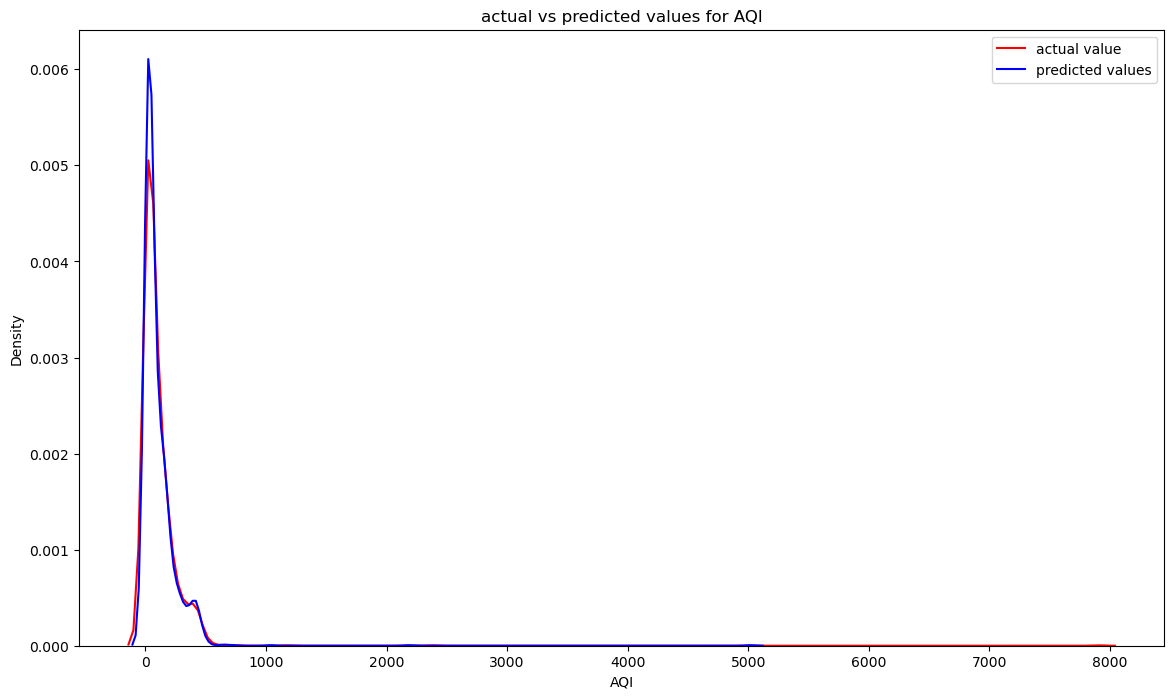

In [56]:
plt.figure(figsize=(14,8))
ax= sns.distplot(Y_test, hist=False , color="r", label="actual value ")
sns.distplot(test_preds, hist=False, color="b", label="predicted values", ax=ax)

plt.title('actual vs predicted values for AQI')
plt.legend()
plt.show()
plt.close()

In [ ]:
# Gradient Boosting Regressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# create a Gradient Boosting regression model
GBM_reg = GradientBoostingRegressor()

# fit the model on training data
GBM_reg.fit(X_train, Y_train)

# predict the target values for both training and test data
train_preds = GBM_reg.predict(X_train)
test_preds21 = GBM_reg.predict(X_test)

# calculate R-squared for both training and test data
train_r2 = r2_score(Y_train, train_preds)
test_r2 = r2_score(Y_test, test_preds)

# calculate RMSE for both training and test data
train_rmse = np.sqrt(mean_squared_error(Y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(Y_test, test_preds))

# calculate MSE for both training and test data
train_mse = mean_squared_error(Y_train, train_preds)
test_mse = mean_squared_error(Y_test, test_preds)

print('Training R-squared:', train_r2)
print('Test R-squared:', test_r2)
print('Training RMSE:', train_rmse)
print('Test RMSE:', test_rmse)
print('Training MSE:', train_mse)
print('Test MSE:', test_mse)

Training R-squared: 0.9997238124997985
Test R-squared: 0.9892578660199087
Training RMSE: 2.9145822151317247
Test RMSE: 22.19025194046535
Training MSE: 8.494789488762152
Test MSE: 492.40728118132625


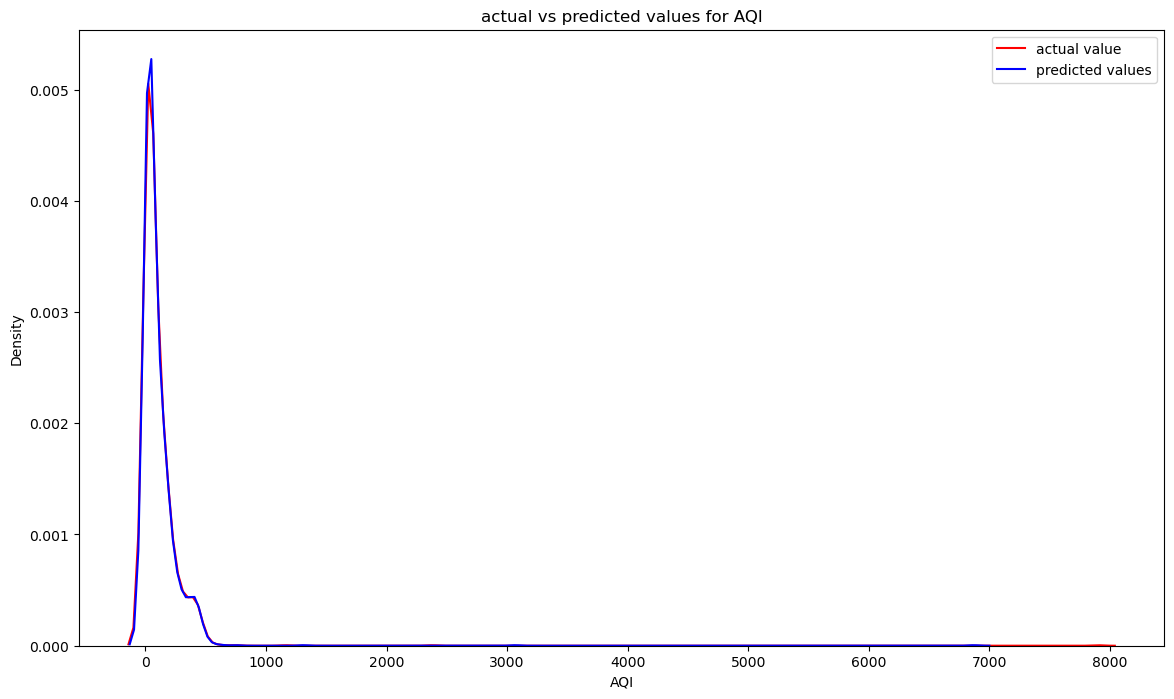

In [88]:
plt.figure(figsize=(14,8))
ax= sns.distplot(Y_test, hist=False , color="r", label="actual value ")
sns.distplot(test_preds21, hist=False, color="b", label="predicted values", ax=ax)

plt.title('actual vs predicted values for AQI')
plt.legend()
plt.show()
plt.close()